In [2]:
import pandas as pd

df = pd.read_csv('/Users/ralphrelucio/notebook/fct_invoice.csv')

df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
cf = pd.read_json('/Users/ralphrelucio/notebook/dim_customer.json')

cf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


EASY
1. How many unique customers are in the dataset? 
# 4992

In [4]:
# unique_customers =cf['first_name'].nunique()
unique_customers =cf['id'].nunique()

full_name = cf['first_name'].str.cat(cf['last_name'], sep=" ")

full_name.nunique()

4992

2. What are the different categories of products available? How many unique categories are there?
# 8: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys' 'Technology' 'Souvenir']

In [5]:
col = df['category']

unique_category = col.unique() #8
print(unique_category)

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


3. Which payment method is the most popular? How many times was it used?
# Cash - 44447

In [6]:
df.groupby('payment_method').count()['invoice_no']

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: invoice_no, dtype: int64

Medium

1. What are the three most popular categories, by total sales?
## Clothing (34_487), Cosmetics (15_097), Food & Beverage (14_776)


In [7]:
df.groupby('category').count()['invoice_no']

category
Books               4981
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Shoes              10034
Souvenir            4999
Technology          4996
Toys               10087
Name: invoice_no, dtype: int64

2. What are the total sales attributed to customers over the age of 45?
# 84307291.82


In [8]:
invoice = pd.read_csv('/Users/ralphrelucio/notebook/fct_invoice.csv')
customer = pd.read_json('/Users/ralphrelucio/notebook/dim_customer.json')

In [10]:
invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [9]:
customer

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [11]:
merged_df = pd.merge(
    invoice,
    customer,
    how='inner',
    left_on='customer_id',
    right_on='id'
)

In [12]:
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez


In [13]:
merged_df['sales'] = merged_df['price'] * merged_df['quantity']

In [14]:
merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,NaN,William,M,229,Anderson,7502.00
1,I126377,229,Cosmetics,2,81.32,Credit Card,5/4/2021,Metrocity,NaN,William,M,229,Anderson,162.64
2,I178419,229,Shoes,3,1800.51,Debit Card,1/6/2021,Istinye Park,NaN,William,M,229,Anderson,5401.53
3,I847727,229,Clothing,3,900.24,Credit Card,21/08/2022,Zorlu Center,NaN,William,M,229,Anderson,2700.72
4,I219251,229,Shoes,5,3000.85,Credit Card,23/06/2022,Istinye Park,NaN,William,M,229,Anderson,15004.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I198027,4973,Shoes,1,600.17,Cash,8/11/2021,Kanyon,NaN,Melissa,F,4973,Bell,600.17
99453,I989120,6161,Books,5,75.75,Cash,8/1/2021,Viaport Outlet,36.0,Leslie,F,6161,Bass,378.75
99454,I791963,6779,Clothing,5,1500.40,Credit Card,6/3/2021,Metropol AVM,NaN,Kelly,F,6779,Roberts,7502.00
99455,I100582,8386,Clothing,2,600.16,Cash,2/11/2021,Istinye Park,47.0,Shawn,M,8386,Perez,1200.32


In [15]:
sales_sum = merged_df.groupby('age').sum()['sales']
sales_45 = sales_sum.loc[45:].sum()

sales_45

84307291.82

3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [16]:
sorted_merged_df = merged_df.sort_values(by='invoice_date', ascending=True)
sorted_merged_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,age,first_name,gender,id,last_name,sales
98563,I244413,2618,Clothing,1,300.08,Cash,1/1/2021,Kanyon,NaN,Leslie,M,2618,Matthews,300.08
22217,I234686,299,Cosmetics,2,81.32,Debit Card,1/1/2021,Kanyon,76.0,Zachary,M,299,Rogers,162.64
57064,I309608,660,Cosmetics,1,40.66,Cash,1/1/2021,Emaar Square Mall,34.0,Kurt,M,660,Gardner,40.66
43832,I313757,313,Clothing,4,1200.32,Credit Card,1/1/2021,Mall of Istanbul,30.0,Krystal,F,313,Massey,4801.28
81594,I225263,1576,Technology,5,5250.00,Credit Card,1/1/2021,Kanyon,NaN,Adam,M,1576,Carroll,26250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30032,I260011,338,Shoes,4,2400.68,Cash,9/9/2022,Mall of Istanbul,64.0,Belinda,F,338,Barron,9602.72
76244,I250511,498,Cosmetics,5,203.30,Debit Card,9/9/2022,Kanyon,71.0,Andre,M,498,Johnson,1016.50
58369,I429795,721,Books,1,15.15,Debit Card,9/9/2022,Istinye Park,NaN,Randall,M,721,Ayers,15.15
2327,I260046,191,Technology,3,3150.00,Cash,9/9/2022,Kanyon,72.0,Jaclyn,F,191,Burke,9450.00


In [17]:
uni_invoice = sorted_merged_df['invoice_date'].value_counts().sort_index()

uni_invoice

invoice_date
1/1/2021     105
1/1/2022     101
1/1/2023     145
1/10/2021    132
1/10/2022    126
            ... 
9/7/2022     110
9/8/2021     135
9/8/2022     126
9/9/2021     136
9/9/2022     138
Name: count, Length: 797, dtype: int64

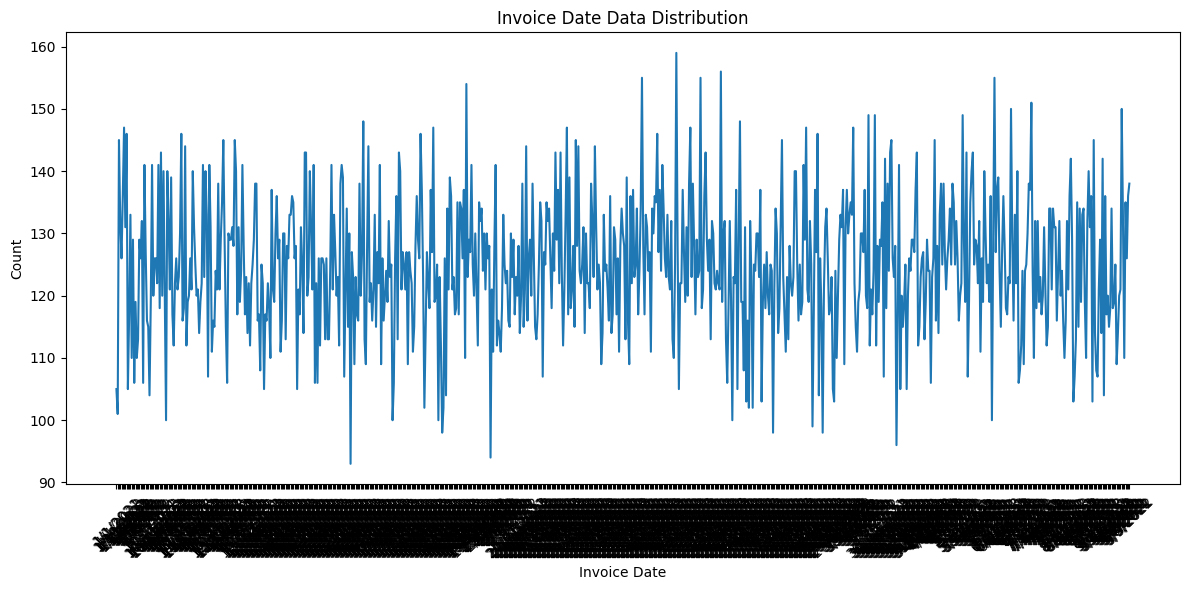

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(uni_invoice.index,uni_invoice.values)
plt.xlabel('Invoice Date')
plt.ylabel('Count')
plt.title('Invoice Date Data Distribution')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [21]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
merged_df['age range'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

pivot_table = merged_df.pivot_table(values='sales', index='category', columns='age range')
pivot_table

age range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,171.482328,166.587006,166.560355,170.320842,163.994845,170.166964,161.643534,142.594257
Clothing,3384.365944,3244.283000,3346.750991,3272.407878,3332.209572,3299.494406,3304.407389,3318.453452
Cosmetics,473.429468,442.510283,441.029438,452.924359,435.740617,455.725684,437.448384,435.466126
Food & Beverage,57.397781,55.384959,57.801160,56.955506,55.490300,57.411674,57.600456,55.925210
Shoes,6271.501193,6637.478792,7010.384150,6802.529247,6739.973634,6797.722756,6599.351804,6945.104477
Souvenir,136.004595,122.029408,128.438770,134.036412,127.421018,125.262701,124.802630,126.464062
Technology,12481.690141,11424.095023,11735.875706,11384.210526,11454.545455,10986.315789,11792.812500,10276.595745
Toys,393.093120,410.823265,392.688913,388.978070,388.468161,395.196288,398.895196,377.122388
